In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_edges': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 '_errors': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[2.000 ± 0.882   1.551 ± 0.371   1.493 ± 0.216   1.543 ± 0.143
 1.440 ± 0.123   1.447 ± 0.120   1.583 ± 0.156   1.511 ± 0.207
 1.650 ± 0.422   1.459 ± 0.709]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[2.000 ± 1.414   6.000 ± 2.449   2.000 ± 1.414   6.000 ± 2.449
 11.000 ± 3.317   11.000 ± 3.317   21.000 ± 4.583   24.000 ± 4.899
 28.000 ± 5.292   52.000 ± 7.211   63.000 ± 7.937   64.000 ± 8.000
 53.000 ± 7.280   82.000 ± 9.055   74.000 ± 8.602   70.000 ± 8.367
 73.000 ± 8.544   73.000 ± 8.544   47.000 ± 6.856   59.000 ± 7.681
 53.000 ± 7.280   38.000 ± 6.164   26.000 ± 5.099   20.000 ± 4.472
 17.000 ± 4.123   10.000 ± 3.162   6.000 ± 2.449   4.000 ± 2.000
 2.000 ± 1.414   3.000 ± 1.732]

Or, just explicitly plot it with matplotlib.

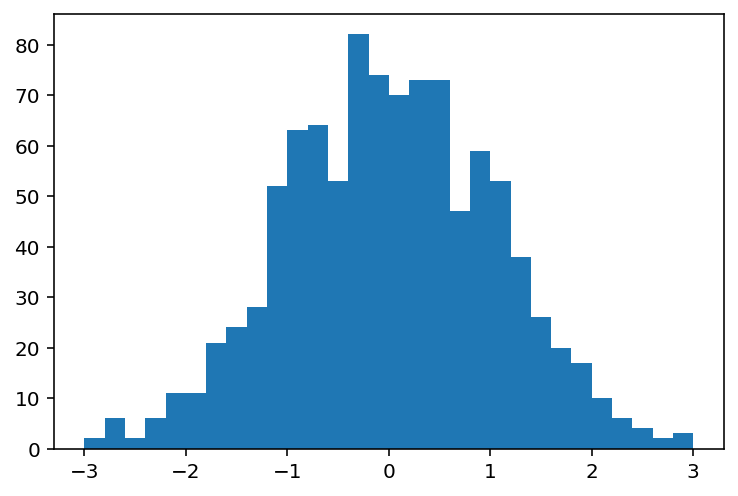

In [6]:
num.plot()

Change the style and show bin counts with some more options.

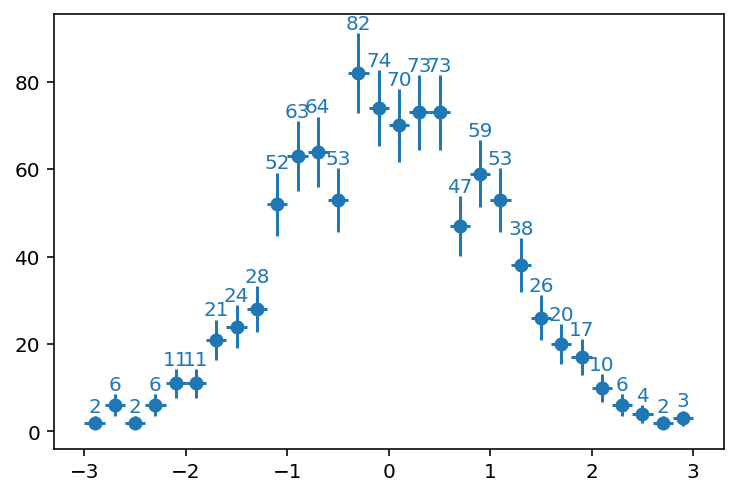

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[4.000 ± 1.764   3.102 ± 0.741   2.987 ± 0.431   3.086 ± 0.286
 2.880 ± 0.245   2.894 ± 0.240   3.165 ± 0.312   3.023 ± 0.413
 3.300 ± 0.844   2.918 ± 1.418]

Make a more complicated plot with a ratio panel.

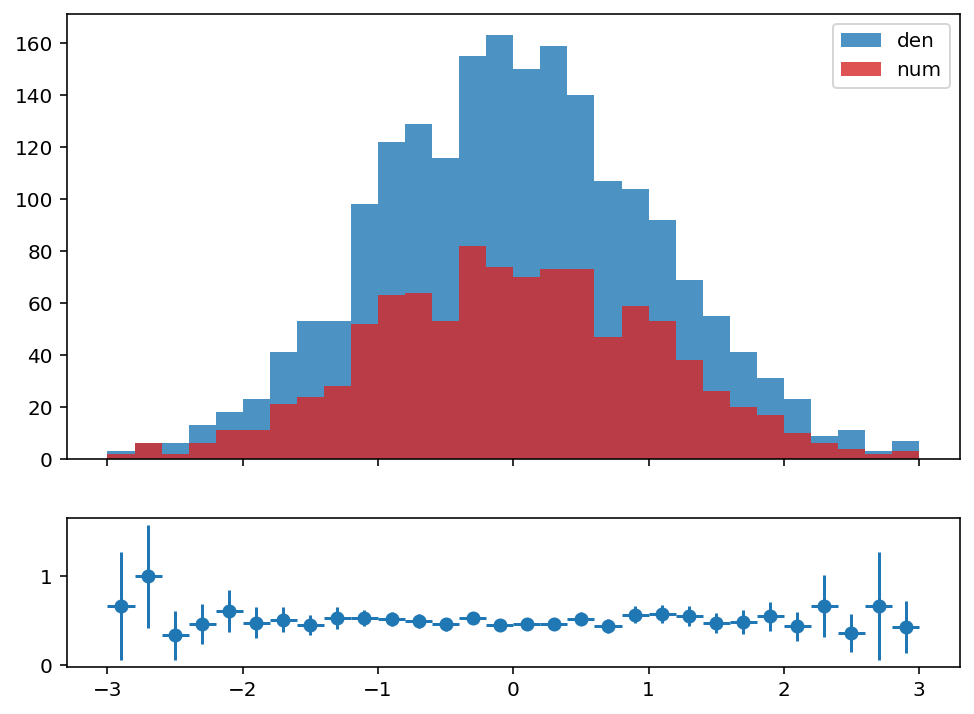

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True)
ax1.legend()

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [2.0, 6.0, 2.0, 6.0, 11.0, 11.0, 21.0, 24.0, 28.0, 52.0, 63.0, 64.0, 53.0, 82.0, 74.0, 70.0, 73.0, 73.0, 47.0, 59.0, 53.0, 38.0, 26.0, 20.0, 17.0, 10.0, 6.0, 4.0, 2.0, 3.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.4142135623730951, 2.449489742783178, 1.4142135623730951, 2.449489742783178, 3.3166247903554, 3.3166247903554, 4.58257569495584, 4.898979485566356, 5.291502622129181, 7.211102550927978, 7.937253933193772, 8.0, 7.280109889280518, 9.055385138137417, 8.602325267042627, 8.366600265340756, 8.54400374531753, 8.54400374531753, 6.855654600401044, 7.681145747868608, 

In [11]:
Hist1D.from_json(num.to_json())

[2.000 ± 1.414   6.000 ± 2.449   2.000 ± 1.414   6.000 ± 2.449
 11.000 ± 3.317   11.000 ± 3.317   21.000 ± 4.583   24.000 ± 4.899
 28.000 ± 5.292   52.000 ± 7.211   63.000 ± 7.937   64.000 ± 8.000
 53.000 ± 7.280   82.000 ± 9.055   74.000 ± 8.602   70.000 ± 8.367
 73.000 ± 8.544   73.000 ± 8.544   47.000 ± 6.856   59.000 ± 7.681
 53.000 ± 7.280   38.000 ± 6.164   26.000 ± 5.099   20.000 ± 4.472
 17.000 ± 4.123   10.000 ± 3.162   6.000 ± 2.449   4.000 ± 2.000
 2.000 ± 1.414   3.000 ± 1.732]

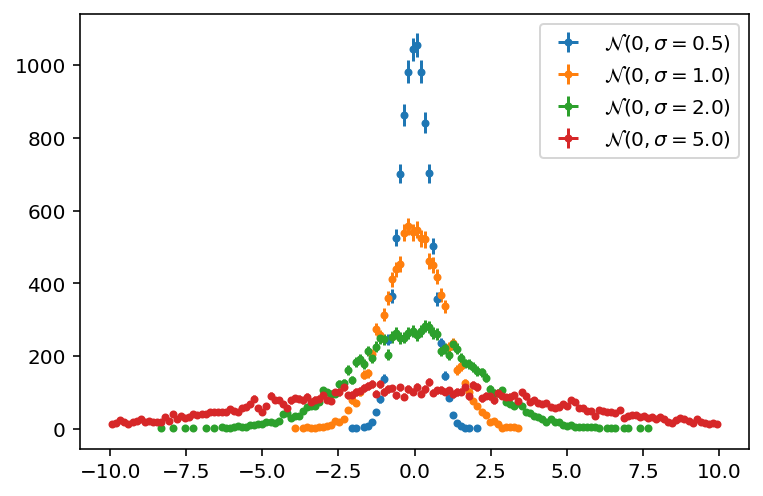

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0).legend() for sigma in [0.5,1,2,5]
];

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [13]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [1.000 ± 1.000   1.000 ± 1.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]


Similar to the 1D object, the HTML representation for 2D histograms has a simplified plot but without explicit bin counts. Instead, if the number of bins is not too large, you can hover over the output and see values at the bottom. To keep it simple, only SVG and CSS code is used--no JS.

In [14]:
h

[[1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 ...
 [1.000 ± 1.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [1.000 ± 1.000   1.000 ± 1.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]

Or just plot it with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

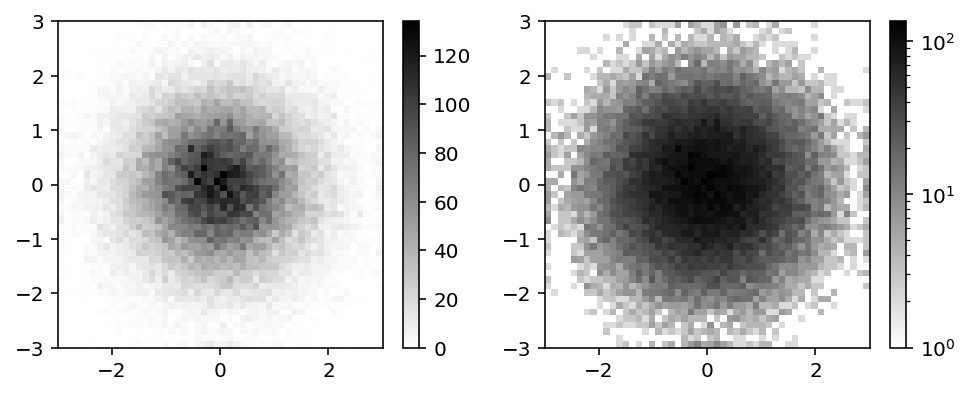

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="binary")
h.plot(ax=ax2, cmap="binary", logz=True)